In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
female_birth = pd.read_csv('daily-total-female-births-in-cal.csv', index_col = [0], parse_dates =[0])

In [3]:
female_birth.head()

,"Daily total female births in California, 1959"
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [4]:
type(female_birth)

pandas.core.frame.DataFrame

In [5]:
series_value = female_birth.values

In [6]:
type(series_value)

numpy.ndarray

In [7]:
female_birth.describe()

,"Daily total female births in California, 1959"
count,366.000000
mean,47.218579
std,100.472534
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,1959.000000


In [8]:
female_birth = female_birth[0:365]

In [9]:
female_birth.describe()

,"Daily total female births in California, 1959"
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


<Axes: xlabel='Date'>

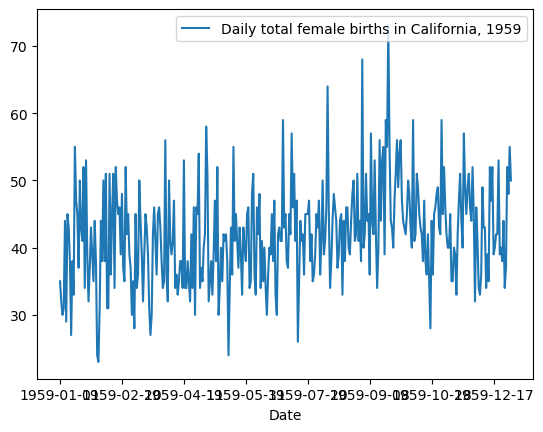

In [10]:
female_birth.plot()

In [11]:
#stationary series is important while dealing with time series problem
#we see the difference between the current term and previous one

In [12]:
#example - 5 day rolling average
female_birth_mean = female_birth.rolling(window = 20).mean()

<Axes: xlabel='Date'>

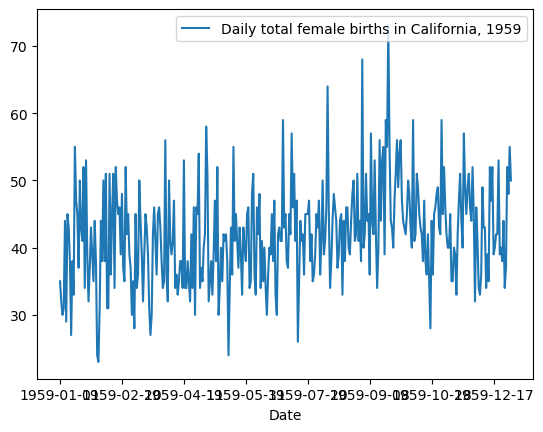

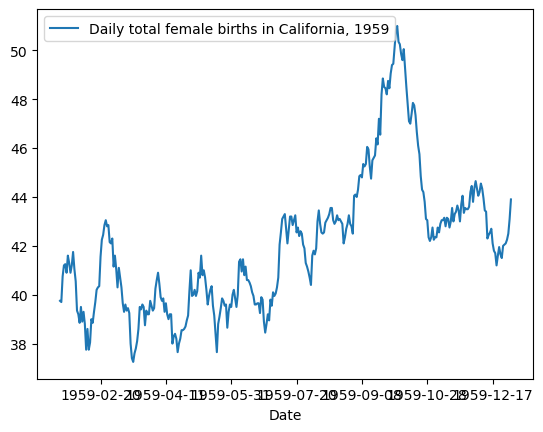

In [13]:
female_birth.plot()
female_birth_mean.plot()

In [14]:
#the above plot is the moving average, helps in getting us the trend

In [15]:
#What is a baseline model?
#very basic - your previous value will reflect the future 
#basically first value is used as the next one

In [16]:
#series in df as numpy does not have shift function mentioned below
value = pd.DataFrame(series_value)

In [17]:
value

,0
0,35
1,32
2,30
3,31
4,44
...,...
361,52
362,48
363,55
364,50


In [18]:
birth_df = pd.concat([value,value.shift(1)], axis = 1)

In [19]:
birth_df

,0,0
0,35,NaN
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0
...,...,...
361,52,37.0
362,48,52.0
363,55,48.0
364,50,55.0


In [20]:
birth_df.columns = ['actual_birth', 'forecast_birth']

In [21]:
birth_df.head()

,actual_birth,forecast_birth
0,35,NaN
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0


In [22]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [24]:
birth_test = birth_df[1:]

In [25]:
birth_test.head()

,actual_birth,forecast_birth
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0
5,29,44.0


In [41]:
birth_test = birth_test[0:364]

In [42]:
birth_error = mean_squared_error(birth_test.actual_birth, birth_test.forecast_birth)

In [43]:
birth_error

84.4297520661157

In [44]:
np.sqrt(birth_error)

9.188566377086019

In [47]:
#the above one is the baseline method result 
#this means that whaever next advanced model you will 
#take should have less error than this

#### ARIMA - Autoregressive Integrated Moving Average 

Autoregressive - current value is correlated to the previous value (p)
Integrated is the order of difference (d)
Moving average is the smoothing part (q)

In [50]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [51]:
# plot_acf is to identify parameter Q
#ARIMA(p,d,q)   q we will ientify with plot_acf

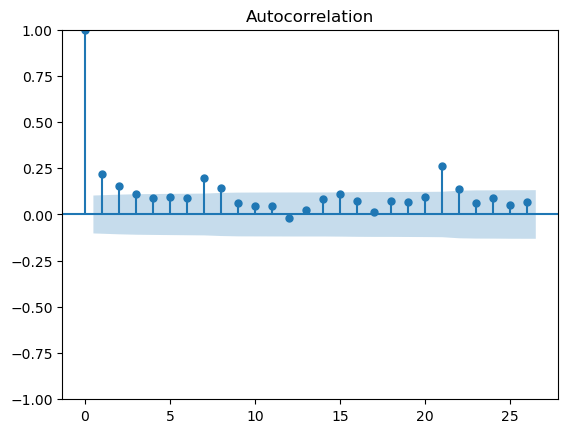

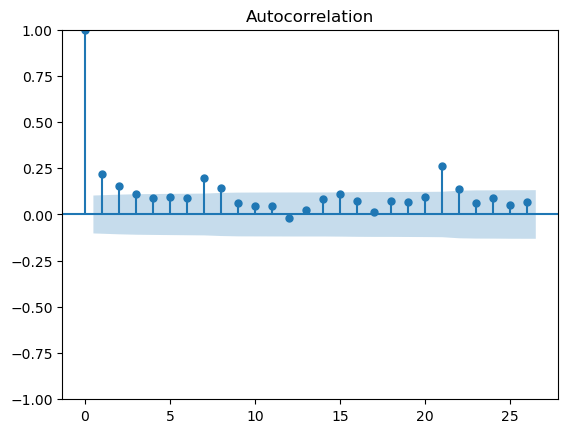

In [52]:
plot_acf(female_birth)

As seen above we can experiment with p = 2,3, and 4 as they are within the critical limit (blue color) maximum 4

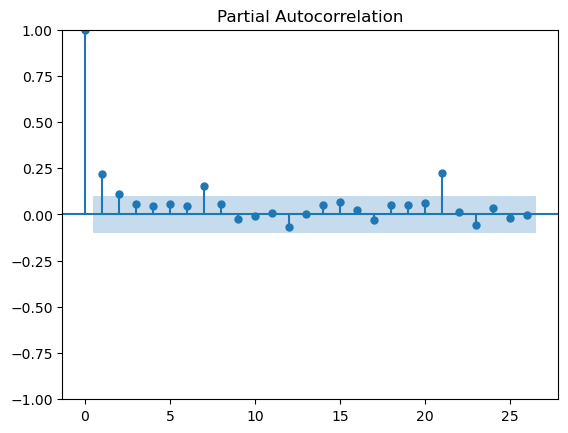

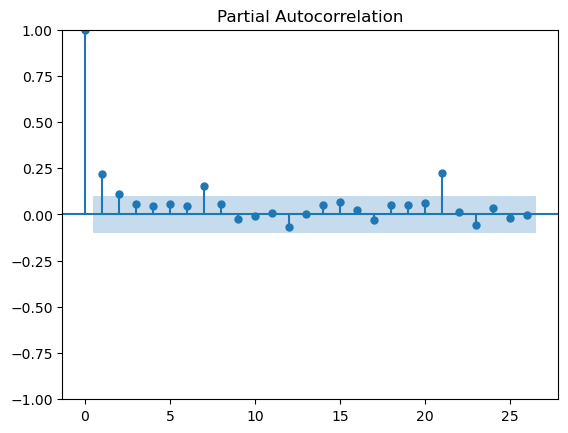

In [54]:
plot_pacf(female_birth) # to identify value of p

In [55]:
# p = 2,3, d = 0 and q = 3,4

In [56]:
female_birth.size

365

In [58]:
birth_train = female_birth[0:330]
birth_test = female_birth[330:365]

In [60]:
birth_test.size

35

In [63]:
from statsmodels.tsa.arima.model import ARIMA 

In [72]:
birth_model = ARIMA(birth_train, order = (2,1,3))

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [73]:
birth_model_fit = birth_model.fit()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [74]:
birth_model_fit.aic

2229.8547372046874

In [75]:
#smaller the aic value, its better

Akaike Information Criterion (AIC) is a measure used in statistical modeling to evaluate and compare the goodness of fit of different models while taking into account the complexity of the models. AIC helps to balance the trade-off between model fit and model complexity by penalizing models with more parameters, thereby avoiding overfitting.

In [90]:
birth_forecast = birth_model_fit.forecast(steps = 35)

In [93]:
print(birth_forecast)

1959-11-27    45.010462
1959-11-28    44.973109
1959-11-29    44.560318
1959-11-30    44.722384
1959-12-01    44.439388
1959-12-02    44.646807
1959-12-03    44.410509
1959-12-04    44.620701
1959-12-05    44.407150
1959-12-06    44.608778
1959-12-07    44.410661
1959-12-08    44.601118
1959-12-09    44.415826
1959-12-10    44.594919
1959-12-11    44.421198
1959-12-12    44.589380
1959-12-13    44.426387
1959-12-14    44.584258
1959-12-15    44.431299
1959-12-16    44.579474
1959-12-17    44.435920
1959-12-18    44.574989
1959-12-19    44.440261
1959-12-20    44.570782
1959-12-21    44.444335
1959-12-22    44.566834
1959-12-23    44.448160
1959-12-24    44.563129
1959-12-25    44.451749
1959-12-26    44.559651
1959-12-27    44.455118
1959-12-28    44.556388
1959-12-29    44.458280
1959-12-30    44.553325
1959-12-31    44.461247
Freq: D, Name: predicted_mean, dtype: float64


In [94]:
birth_test

,"Daily total female births in California, 1959"
Date,
1959-11-27,51
1959-11-28,46
1959-11-29,44
1959-11-30,52
1959-12-01,45
1959-12-02,32
1959-12-03,46
1959-12-04,41
1959-12-05,34


In [95]:
np.sqrt(mean_squared_error(birth_test, birth_forecast))

6.6639934812506585

In [97]:
#the above value(error) is better then the baseline model